In [7]:
#import pandas

import pandas as pd

#read the csv using pandas

#press shift tab twice after clicking inside paranthesis to get the help
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

print data.head()


print data.tail()

print data.shape


      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
        TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4
(200, 4)


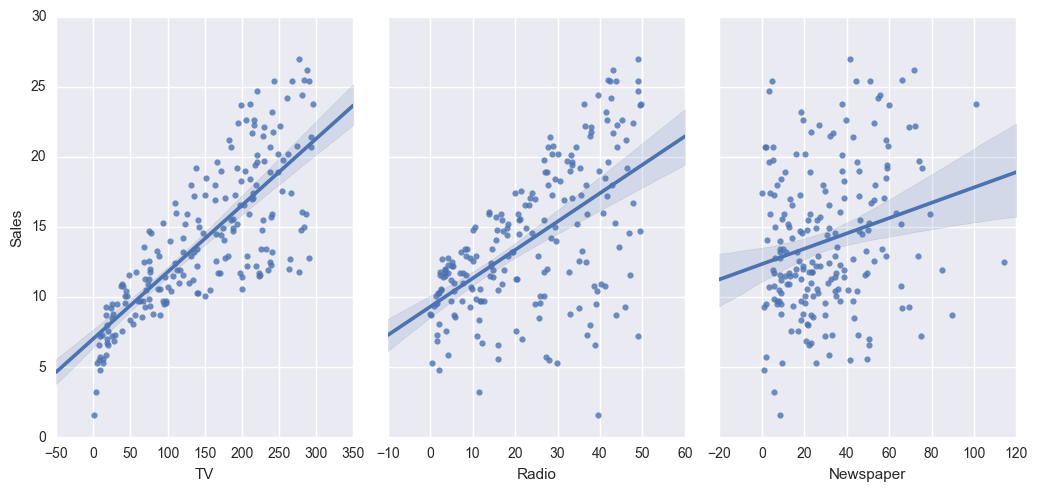

In [11]:
import seaborn as sns
#to display inline matplot within notebook
%matplotlib inline

sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size =5,kind='reg',aspect=0.7)

scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
However, pandas is built on top of NumPy.
Thus, X can be a pandas DataFrame and y can be a pandas Series!


In [14]:
feature_cols=['TV','Radio','Newspaper']
x= data[feature_cols]

y= data['Sales']

print x.shape
print y.shape

(200, 3)
(200L,)


In [41]:
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

print x_train.shape
print y_train.shape

print x_test.shape

linreg = LinearRegression()

linreg.fit(x_train,y_train)
y_pred  = linreg.predict(x_test)


print linreg.coef_

print linreg.intercept_

(140, 3)
(140L,)
(60, 3)
[ 0.04645076  0.17628658  0.00070581]
2.94635598937


Comparing these metrics:
MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [46]:
from sklearn import metrics
import numpy as np

print(metrics.mean_absolute_error(y_test, y_pred))


print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.39889534641
2.81303943507
1.67721180388


In [47]:
#removing the newspaper and re-running the data

# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994
